## Mission: avengers, Assemble!


icsubi를 다 만들고 보니 사이렌이 울렸다. 국제보안기구 <U.B.U.N.T.U>에게서 긴급 이메일이 도착했다. 죄없는 컴퓨터들에게 무차별적인 Request를 통해 이상상태로 만드는 악당 <디도스>가 인터넷을 침략하려고 한다는 소식을 전했다. 이를 막기 위해 최정예부대인 우리는 Abengers (저작권을 조심합시다) 를 소집하기로 했다. 도와줘요 Abengers!

- 이 미션은 다음 [데이터셋](https://www.kaggle.com/dannielr/marvel-superheroes?select=charcters_stats.csv)을 이용해서 진행합니다.
- 제출할 파일 : abengers.ipynb


### Core Mission

- 다음 질문에 답하시오.
    - 캐릭터는 저마다 지능, 힘, ... 등 다양한 수치를 지니고 있다. 이러한 수치의 합이 가장 큰 캐릭터는 누구인가? 이를 보이기 위한 과정을 보여라.
    - 좋은 캐릭터와 나쁜 캐릭터의 능력치들의 수치 분포를 알고 싶다. 이를 표현하기 위한 적절한 그래프를 선택해서 이를 위한 전처리를 진행하고, 시각화하여라.


In [187]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 수치의 합이 가장 큰 캐릭터 구하기
avengers = pd.read_csv("./charcters_stats.csv")
avengers[['Name','Total']].sort_values('Total',ascending = False)

,Name,Total
361,Martian Manhunter,581
242,General Zod,579
535,Superboy-Prime,579
537,Superman,579
16,Amazo,575
...,...,...
462,Renata Soliz,5
137,Captain Mar-vell,5
136,Captain Epic,5
466,Ripcord,5


In [149]:
avengers[avengers.Alignment=='good']['Total'].mean()

214.99074074074073

In [150]:
avengers[avengers.Alignment=='bad']['Total'].mean()

247.21212121212122

In [151]:
avengers[avengers.Alignment=='neutral']['Total'].mean()

355.3636363636364

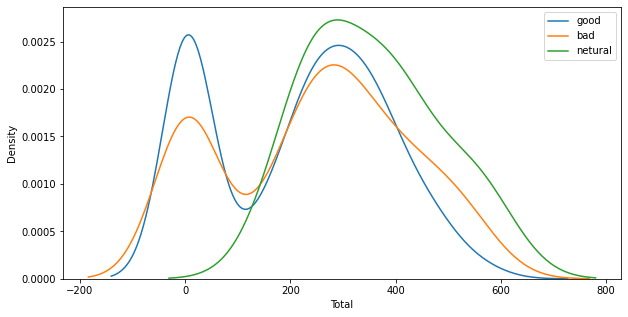

In [188]:
fig,ax = plt.subplots(1,1,figsize = (10,5))
sns.kdeplot(x=avengers[avengers.Alignment == 'good']['Total'],ax=ax)
sns.kdeplot(x=avengers[avengers.Alignment == 'bad']['Total'],ax=ax)
sns.kdeplot(x=avengers[avengers.Alignment == 'neutral']['Total'],ax=ax)
plt.legend(["good","bad",'netural'])
plt.show()

### Extra Mission

- 다음 질문에 답하시오.
    - 캐릭터는 저마다 지능, 힘, ... 등 다양한 수치를 지니고 있다. 또한 각 캐릭터는 DC, 마블 등 다양한 코믹스 회사를 바탕으로 하고 있다. 어떤 코믹스 회사의 캐릭터들이 능력치 합의 평균이 가장 큰가? 이를 보이기 위한 과정을 보여라.
    - 좋은 캐릭터와 나쁜 캐릭터가 격돌한다고 한다. 격돌하는 경우 캐릭터들의 능력치의 합의 평균이 큰 팀이 이긴다고 한다. 단, 불의를 못참는 중립 캐릭터들은 중립캐릭터가 없었을 당시에 열세인 팀에 가담한다. 이러한 상황일때 결과적으로 어떤 캐릭터 진영이 승리할 것인가? 이를 보이기 위한 과정을 보여라.
    - 이 데이터를 이용해 진행하고 싶은 EDA 및 시각화가 있다면 자유롭게 진행하여라.
    - 이 과제는 핵심 임무 이후에 진행되어야 한다.

In [189]:
marvel_df = pd.read_csv("./marvel_characters_info.csv")

# 코믹스 회사 알아보기
marvel_company = marvel_df['Publisher'].unique()
marvel_company

array(['Marvel Comics', 'Dark Horse Comics', 'DC Comics', 'NBC - Heroes',
       'Wildstorm', 'Image Comics', nan, 'Icon Comics', 'SyFy',
       'Hanna-Barbera', 'George Lucas', 'Team Epic TV', 'South Park',
       'HarperCollins', 'ABC Studios', 'Universal Studios', 'Star Trek',
       'IDW Publishing', 'Shueisha', 'Sony Pictures', 'J. K. Rowling',
       'Titan Books', 'Rebellion', 'Microsoft', 'J. R. R. Tolkien'],
      dtype=object)

In [192]:
# marvel의 회사 값이 있는 df와 캐릭터 능력치가 있는 df 합치기
avengers = pd.merge(avengers,marvel_df,on = "Name",how = 'outer')
avengers

,Name,Alignment_x,Intelligence,Strength,Speed,Durability,Power,Combat,Total,ID,Alignment_y,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight
0,3-D Man,good,50.0,31.0,43.0,32.0,25.0,52.0,233.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A-Bomb,good,38.0,100.0,17.0,80.0,17.0,64.0,316.0,0.0,good,Male,yellow,Human,No Hair,Marvel Comics,-,203.0,441.0
2,Abe Sapien,good,88.0,14.0,35.0,42.0,35.0,85.0,299.0,1.0,good,Male,blue,Icthyo Sapien,No Hair,Dark Horse Comics,blue,191.0,65.0
3,Abin Sur,good,50.0,90.0,53.0,64.0,84.0,65.0,406.0,2.0,good,Male,blue,Ungaran,No Hair,DC Comics,red,185.0,90.0
4,Abomination,bad,63.0,80.0,53.0,90.0,55.0,95.0,436.0,3.0,bad,Male,green,Human / Radiation,No Hair,Marvel Comics,-,203.0,441.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,Vibe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,694.0,good,Male,brown,Human,Black,DC Comics,-,178.0,71.0
761,Violet Parr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,698.0,good,Female,violet,Human,Black,Dark Horse Comics,-,137.0,41.0
762,Vixen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,701.0,good,Female,amber,Human,Black,DC Comics,-,175.0,63.0
763,White Canary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,713.0,bad,Female,brown,Human,Black,DC Comics,-,-99.0,-99.0


In [193]:
# total 능력치가  NaN인 행 제거

avengers = avengers.dropna(axis=0)
avengers

,Name,Alignment_x,Intelligence,Strength,Speed,Durability,Power,Combat,Total,ID,Alignment_y,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight
1,A-Bomb,good,38.0,100.0,17.0,80.0,17.0,64.0,316.0,0.0,good,Male,yellow,Human,No Hair,Marvel Comics,-,203.0,441.0
2,Abe Sapien,good,88.0,14.0,35.0,42.0,35.0,85.0,299.0,1.0,good,Male,blue,Icthyo Sapien,No Hair,Dark Horse Comics,blue,191.0,65.0
3,Abin Sur,good,50.0,90.0,53.0,64.0,84.0,65.0,406.0,2.0,good,Male,blue,Ungaran,No Hair,DC Comics,red,185.0,90.0
4,Abomination,bad,63.0,80.0,53.0,90.0,55.0,95.0,436.0,3.0,bad,Male,green,Human / Radiation,No Hair,Marvel Comics,-,203.0,441.0
5,Abraxas,bad,88.0,100.0,83.0,99.0,100.0,56.0,526.0,4.0,bad,Male,blue,Cosmic Entity,Black,Marvel Comics,-,-99.0,-99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,Yellowjacket,good,88.0,10.0,12.0,28.0,12.0,14.0,164.0,728.0,good,Male,blue,Human,Blond,Marvel Comics,-,183.0,83.0
622,Yellowjacket II,good,50.0,10.0,35.0,28.0,31.0,28.0,182.0,729.0,good,Female,blue,Human,Strawberry Blond,Marvel Comics,-,165.0,52.0
623,Ymir,good,50.0,100.0,27.0,100.0,83.0,28.0,388.0,730.0,good,Male,white,Frost Giant,No Hair,Marvel Comics,white,304.8,-99.0
624,Zatanna,good,75.0,10.0,23.0,28.0,100.0,56.0,292.0,732.0,good,Female,blue,Human,Black,DC Comics,-,170.0,57.0


In [194]:
#marvel과 dc인 캐릭터만 가져오기
marvel_df = avengers[avengers.Publisher == 'Marvel Comics']
marvel_df.head()

,Name,Alignment_x,Intelligence,Strength,Speed,Durability,Power,Combat,Total,ID,Alignment_y,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight
1,A-Bomb,good,38.0,100.0,17.0,80.0,17.0,64.0,316.0,0.0,good,Male,yellow,Human,No Hair,Marvel Comics,-,203.0,441.0
4,Abomination,bad,63.0,80.0,53.0,90.0,55.0,95.0,436.0,3.0,bad,Male,green,Human / Radiation,No Hair,Marvel Comics,-,203.0,441.0
5,Abraxas,bad,88.0,100.0,83.0,99.0,100.0,56.0,526.0,4.0,bad,Male,blue,Cosmic Entity,Black,Marvel Comics,-,-99.0,-99.0
9,Agent Bob,good,10.0,8.0,13.0,5.0,5.0,20.0,61.0,9.0,good,Male,brown,Human,Brown,Marvel Comics,-,178.0,81.0
10,Agent Zero,good,75.0,28.0,38.0,80.0,72.0,95.0,388.0,10.0,good,Male,-,-,-,Marvel Comics,-,191.0,104.0


In [134]:
dc_df = avengers[avengers.Publisher == 'DC Comics']
dc_df.head()

,Name,Alignment_x,Intelligence,Strength,Speed,Durability,Power,Combat,Total,ID,Alignment_y,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight
3,Abin Sur,good,50.0,90.0,53.0,64.0,84.0,65.0,406.0,2.0,good,Male,blue,Ungaran,No Hair,DC Comics,red,185.0,90.0
7,Adam Strange,good,1.0,1.0,1.0,1.0,0.0,1.0,5.0,7.0,good,Male,blue,Human,Blond,DC Comics,-,185.0,88.0
12,Alan Scott,good,63.0,80.0,23.0,90.0,98.0,32.0,386.0,13.0,good,Male,blue,-,Blond,DC Comics,-,180.0,90.0
14,Alfred Pennyworth,good,63.0,10.0,17.0,10.0,7.0,55.0,162.0,16.0,good,Male,blue,Human,Black,DC Comics,-,178.0,72.0
16,Amazo,bad,75.0,100.0,100.0,100.0,100.0,100.0,575.0,19.0,bad,Male,red,Android,-,DC Comics,-,257.0,173.0


In [195]:
# 마블 캐릭터 능력치 평균
marvel_df['Total'].mean()

243.35734870317003

In [144]:
# DC 캐릭터 능력치 평균
dc_df['Total'].mean()

254.88888888888889

In [202]:
list1 = []
# 전체 회사 캐릭터 구하기
for i in marvel_company:
    new_df = avengers[avengers.Publisher == i]
    mean = new_df['Total'].mean()
    list1.append([i,mean])
list1 = pd.DataFrame(list1)
list1 = list1.set_index(list1[0],drop= True)
# 어떠한 회사의 캐릭터들이 능력치 합의 평균이 가장 큰지?
list1[list1[1] ==list1[1].max()]

,0,1
0,,
Shueisha,Shueisha,481.5


In [204]:
# 해당 회사의 캐릭터 평균 능력치
list1

,0,1
0,,
Marvel Comics,Marvel Comics,243.357349
Dark Horse Comics,Dark Horse Comics,196.875000
DC Comics,DC Comics,254.888889
NBC - Heroes,NBC - Heroes,140.526316
Wildstorm,Wildstorm,5.000000
Image Comics,Image Comics,70.615385
NaN,NaN,NaN
Icon Comics,Icon Comics,148.000000
SyFy,SyFy,188.800000


In [212]:
# 좋은 캐릭터 Info
good_avengers = avengers[avengers.Alignment_x == 'good']
good_avengers.head()

,Name,Alignment_x,Intelligence,Strength,Speed,Durability,Power,Combat,Total,ID,Alignment_y,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight
1,A-Bomb,good,38.0,100.0,17.0,80.0,17.0,64.0,316.0,0.0,good,Male,yellow,Human,No Hair,Marvel Comics,-,203.0,441.0
2,Abe Sapien,good,88.0,14.0,35.0,42.0,35.0,85.0,299.0,1.0,good,Male,blue,Icthyo Sapien,No Hair,Dark Horse Comics,blue,191.0,65.0
3,Abin Sur,good,50.0,90.0,53.0,64.0,84.0,65.0,406.0,2.0,good,Male,blue,Ungaran,No Hair,DC Comics,red,185.0,90.0
6,Adam Monroe,good,63.0,10.0,12.0,100.0,71.0,64.0,320.0,6.0,good,Male,blue,-,Blond,NBC - Heroes,-,-99.0,-99.0
7,Adam Strange,good,1.0,1.0,1.0,1.0,0.0,1.0,5.0,7.0,good,Male,blue,Human,Blond,DC Comics,-,185.0,88.0


In [211]:
# 나쁜 캐릭터 Info

bad_avengers = avengers[avengers.Alignment_x == 'bad']
bad_avengers.head()

,Name,Alignment_x,Intelligence,Strength,Speed,Durability,Power,Combat,Total,ID,Alignment_y,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight
4,Abomination,bad,63.0,80.0,53.0,90.0,55.0,95.0,436.0,3.0,bad,Male,green,Human / Radiation,No Hair,Marvel Comics,-,203.0,441.0
5,Abraxas,bad,88.0,100.0,83.0,99.0,100.0,56.0,526.0,4.0,bad,Male,blue,Cosmic Entity,Black,Marvel Comics,-,-99.0,-99.0
11,Air-Walker,bad,50.0,85.0,100.0,85.0,100.0,40.0,460.0,11.0,bad,Male,blue,-,White,Marvel Comics,-,188.0,108.0
16,Amazo,bad,75.0,100.0,100.0,100.0,100.0,100.0,575.0,19.0,bad,Male,red,Android,-,DC Comics,-,257.0,173.0
17,Ammo,bad,1.0,1.0,1.0,1.0,0.0,1.0,5.0,20.0,bad,Male,brown,Human,Black,Marvel Comics,-,188.0,101.0


In [213]:
neutral_avengers = avengers[avengers.Alignment_x == 'neutral']
neutral_avengers.head()

,Name,Alignment_x,Intelligence,Strength,Speed,Durability,Power,Combat,Total,ID,Alignment_y,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight
85,Bizarro,neutral,75.0,95.0,100.0,100.0,95.0,85.0,550.0,92.0,neutral,Male,black,Bizarro,Black,DC Comics,white,191.0,155.0
191,Deadpool,neutral,50.0,15.0,30.0,100.0,100.0,100.0,395.0,212.0,neutral,Male,brown,Mutant,No Hair,Marvel Comics,-,188.0,95.0
194,Deathstroke,neutral,75.0,30.0,35.0,100.0,36.0,90.0,366.0,215.0,neutral,Male,blue,Human,White,DC Comics,-,193.0,101.0
244,Galactus,neutral,100.0,100.0,83.0,100.0,100.0,70.0,553.0,272.0,neutral,Male,black,Cosmic Entity,Black,Marvel Comics,-,876.0,16.0
326,Juggernaut,neutral,44.0,100.0,42.0,100.0,74.0,70.0,430.0,373.0,neutral,Male,blue,Human,Red,Marvel Comics,-,287.0,855.0


In [215]:
good_avengers.Total.mean()

222.58949880668257

In [217]:
bad_avengers.Total.mean()

251.95625

In [218]:
neutral_avengers.Total.mean()

355.3636363636364

### 좋은 캐릭터의 평균 능력치가 나쁜캐릭터의 평균 능력치보다 낮기 때문에  
### 중립 캐릭터들이 좋은 캐릭터에 가담하여 좋은팀이 승리한다.